<a href="https://colab.research.google.com/github/panjiarf4/ImBoost/blob/main/SML_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd

# Baca CSV dengan delimiter titik koma
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project SML 2 DSC/Dataset Sementara.csv', sep=';')


In [40]:
data.head()

,KAB_KOTA,IPM,Anggaran,IPG,PKKP,PPM,PPK,PPK_Makanan,Air Layak,IKK,PDRB,IKKe,Bekerja_Informal,Bekerja_Formal
0,ACEH BARAT,73.69,300.746.751.000,59.59,8.41,17.60,10548,61.65,99.18,93.49,14053,0.75,31.27,17.00
1,ACEH BARAT DAYA,68.75,169.291.551.000,53.61,8.81,15.32,9559,64.03,94.81,92.68,5368,0.46,25.63,33.10
2,ACEH BESAR,75.13,790.470.507.000,50.49,8.13,13.21,10810,58.35,87.99,95.73,18412,0.47,34.31,26.02
3,ACEH JAYA,71.83,132.605.811.000,65.04,8.43,12.25,11007,60.65,75.76,98.86,3607,0.28,45.00,19.18
4,ACEH SELATAN,69.10,260.053.890.000,67.07,10.44,12.02,9190,60.29,83.32,98.65,7466,0.31,32.95,22.42


In [41]:
import pandas as pd
import numpy as np

# Bersihkan nama kolom dari spasi
data.columns = data.columns.str.strip()

# Kolom desimal → JANGAN hapus titik
kolom_float = ['IPM', 'IPG', 'PKKP', 'PPM', 'Air Layak', 'IKK', 'IKKe', 'Bekerja_Informal', 'Bekerja_Formal']

# Kolom ribuan → titik sebagai pemisah ribuan HARUS dihapus
kolom_ribuan = ['Anggaran']

# Kolom integer → hanya PPK yang perlu diubah ke int tanpa desimal
kolom_int = ['PPK', ' PDRB']

# 1️⃣ Proses kolom float
for col in kolom_float:
    if col in data.columns:
        data[col] = data[col].astype(str).replace('-', np.nan)
        data[col] = data[col].str.replace(',', '.', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')

# 2️⃣ Proses kolom ribuan (hapus titik ribuan)
for col in kolom_ribuan:
    if col in data.columns:
        data[col] = data[col].astype(str).replace('-', np.nan)
        data[col] = data[col].str.replace('.', '', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')

# 3️⃣ Proses kolom integer (tampilkan tanpa .0)
for col in kolom_int:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].astype('Int64')  # gunakan Int64 agar tetap bisa handle NaN


In [42]:
print(data.head())
print(data.info())

          KAB_KOTA    IPM      Anggaran    IPG   PKKP    PPM    PPK  \
0       ACEH BARAT  73.69  3.007468e+11  59.59   8.41  17.60  10548   
1  ACEH BARAT DAYA  68.75  1.692916e+11  53.61   8.81  15.32   9559   
2       ACEH BESAR  75.13  7.904705e+11  50.49   8.13  13.21  10810   
3        ACEH JAYA  71.83  1.326058e+11  65.04   8.43  12.25  11007   
4     ACEH SELATAN  69.10  2.600539e+11  67.07  10.44  12.02   9190   

   PPK_Makanan  Air Layak    IKK   PDRB  IKKe  Bekerja_Informal  \
0        61.65      99.18  93.49  14053  0.75             31.27   
1        64.03      94.81  92.68   5368  0.46             25.63   
2        58.35      87.99  95.73  18412  0.47             34.31   
3        60.65      75.76  98.86   3607  0.28             45.00   
4        60.29      83.32  98.65   7466  0.31             32.95   

   Bekerja_Formal  
0           17.00  
1           33.10  
2           26.02  
3           19.18  
4           22.42  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [43]:
import numpy as np
import pandas as pd

# Eksplorasi Data

In [44]:
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
              IPM      Anggaran         IPG        PKKP         PPM  \
count  513.000000  5.100000e+02  513.000000  513.000000  513.000000   
mean    71.928499  1.882286e+12   66.055712   11.096959   11.178304   
std      6.290057  1.656320e+13    9.534562    8.730591    7.076721   
min     36.300000  1.525470e+10   22.910000    0.870000    2.230000   
25%     68.880000  1.564434e+11   60.690000    6.220000    6.360000   
50%     71.700000  2.665191e+11   66.370000    8.700000    9.320000   
75%     75.010000  4.805989e+11   72.810000   12.340000   13.780000   
max     88.770000  3.294744e+14   88.740000   57.910000   41.420000   

                PPK  PPK_Makanan   Air Layak         IKK           PDRB  \
count         513.0   456.000000  507.000000  513.000000     513.000000   
mean   11439.070175    53.739539   86.033669  105.549045   42972.536062   
std     2822.058347     5.879457   14.808424   29.912385   93535.732954   
min          4597.0    36.800000   17

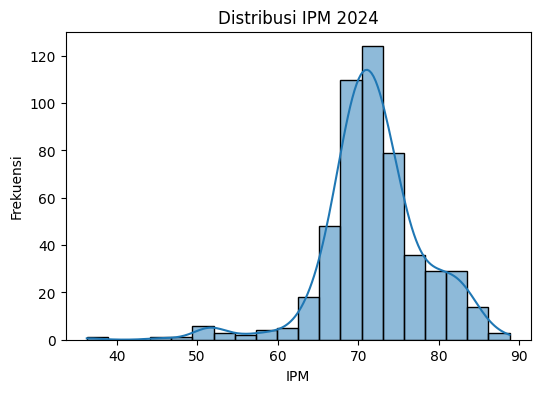

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram IPM
plt.figure(figsize=(6, 4))
sns.histplot(data['IPM'], bins=20, kde=True)
plt.title('Distribusi IPM 2024')
plt.xlabel('IPM')
plt.ylabel('Frekuensi')
plt.show()

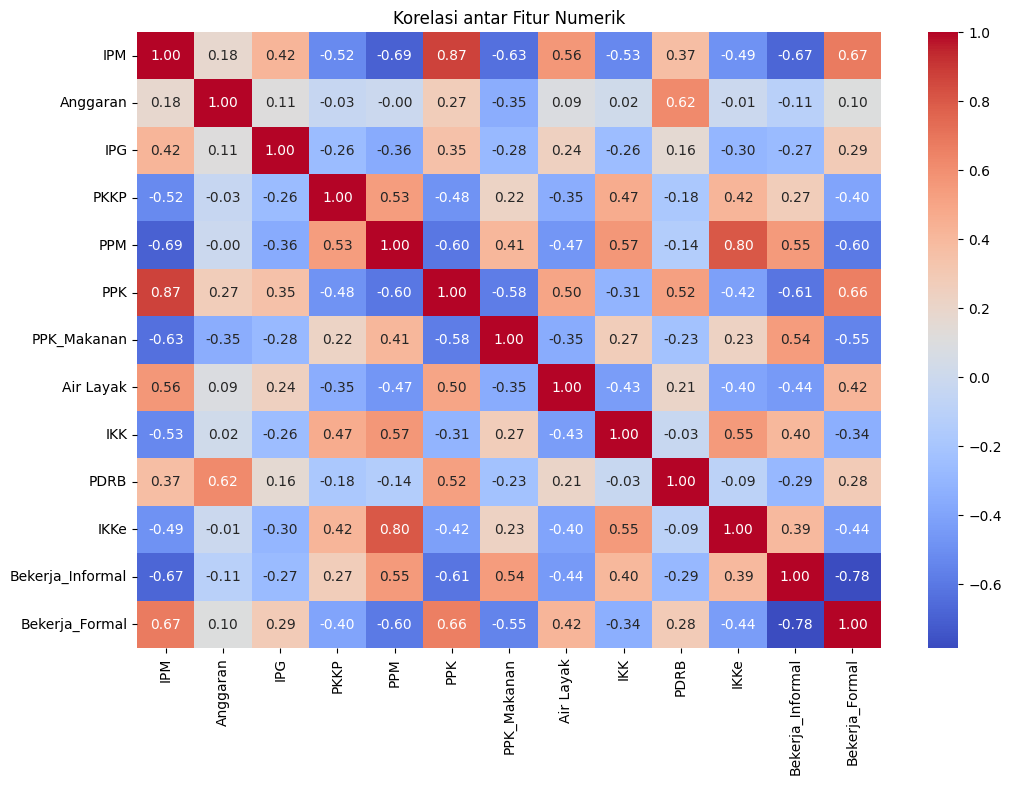

In [46]:
import numpy as np

# Visualisasi korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar Fitur Numerik")
plt.show()

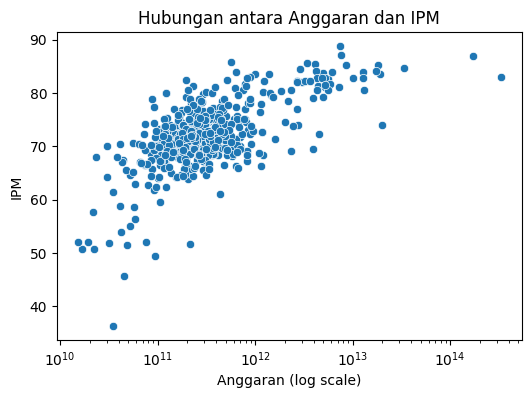

In [47]:
# Scatter plot IPM vs Anggaran
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Anggaran', y='IPM')
plt.title('Hubungan antara Anggaran dan IPM')
plt.xlabel('Anggaran (log scale)')
plt.xscale('log')
plt.ylabel('IPM')
plt.show()

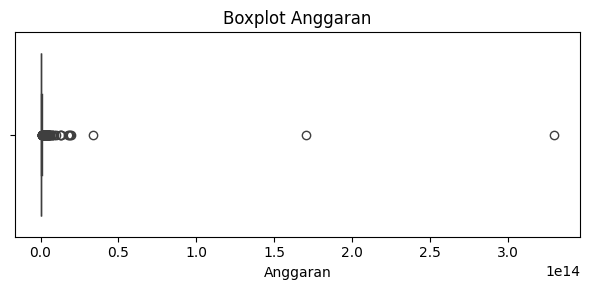

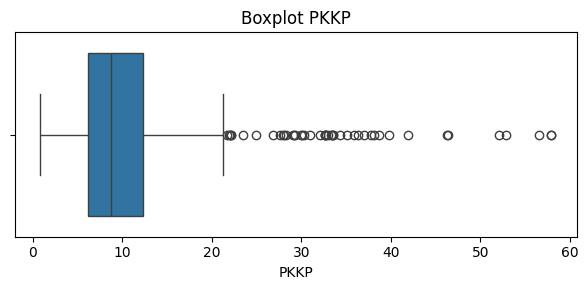

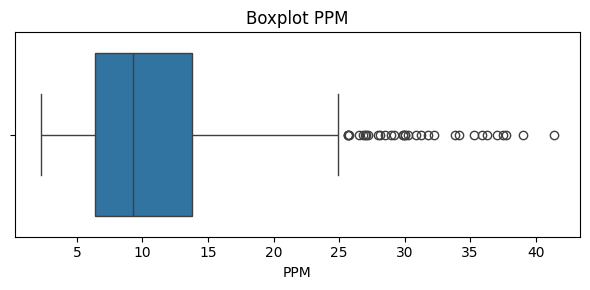

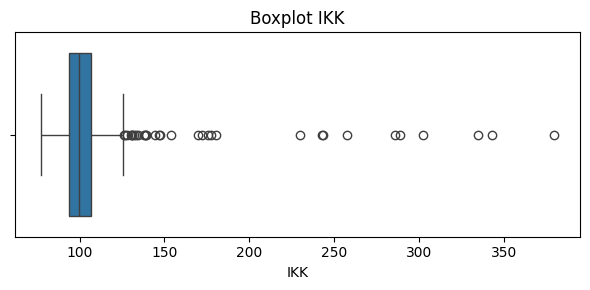

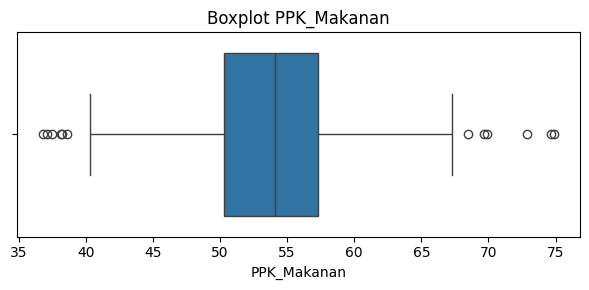

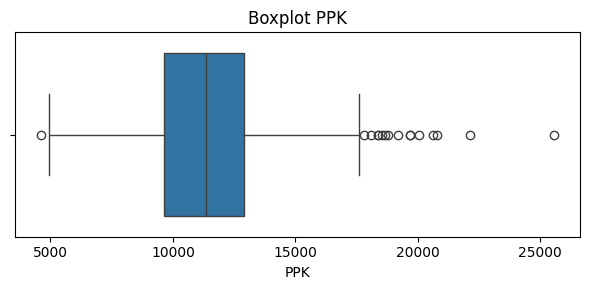

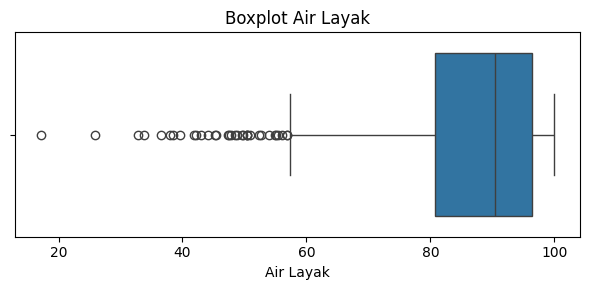

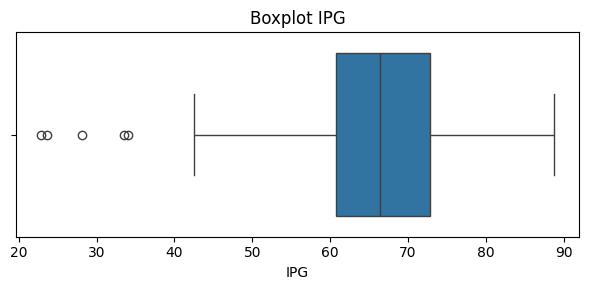

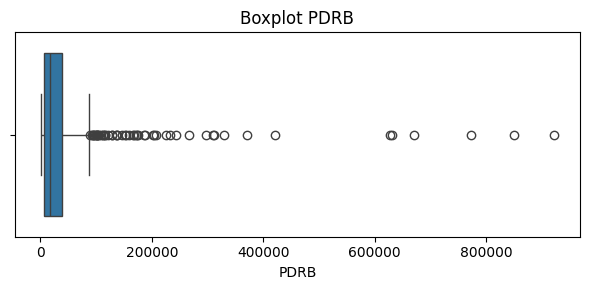

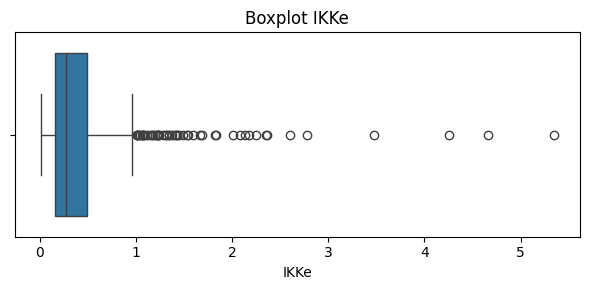

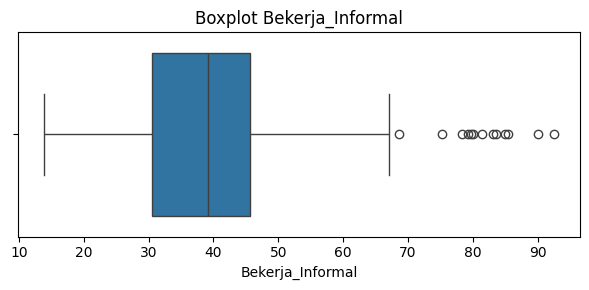

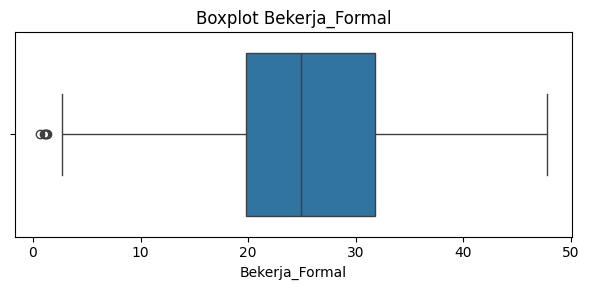

In [86]:
# boxplot
# Pilih ulang kolom numerik jika belum ada
kolom_numerik = ['Anggaran', 'PKKP', 'PPM', 'IKK','PPK_Makanan', 'PPK', 'Air Layak', 'IPG', 'PDRB','IKKe', 'Bekerja_Informal', 'Bekerja_Formal']
for col in kolom_numerik:
    if col in data.columns:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot {col}')
        plt.tight_layout()
        plt.show()


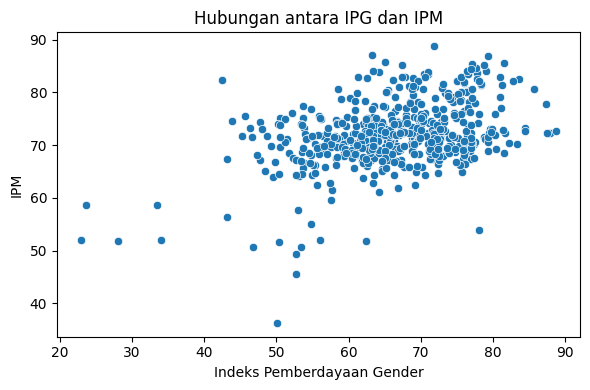

In [57]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='IPG', y='IPM')
plt.title('Hubungan antara IPG dan IPM')
plt.xlabel('Indeks Pemberdayaan Gender')
plt.ylabel('IPM')
plt.tight_layout()
plt.show()


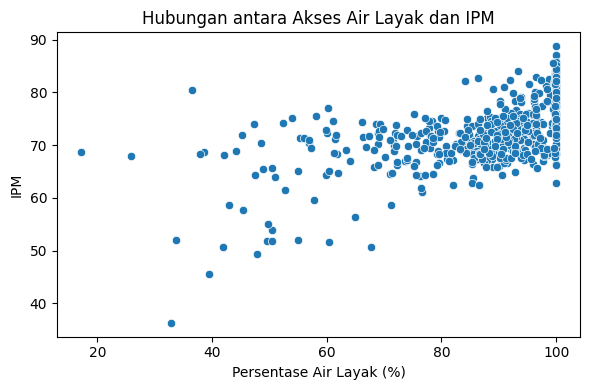

In [58]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Air Layak', y='IPM')
plt.title('Hubungan antara Akses Air Layak dan IPM')
plt.xlabel('Persentase Air Layak (%)')
plt.ylabel('IPM')
plt.tight_layout()
plt.show()


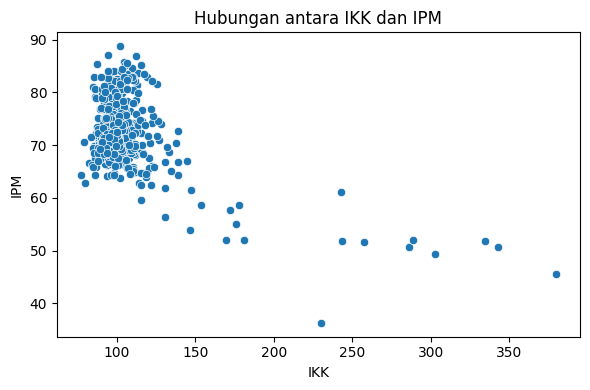

In [59]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='IKK', y='IPM')
plt.title('Hubungan antara IKK dan IPM')
plt.xlabel('IKK')
plt.ylabel('IPM')
plt.tight_layout()
plt.show()


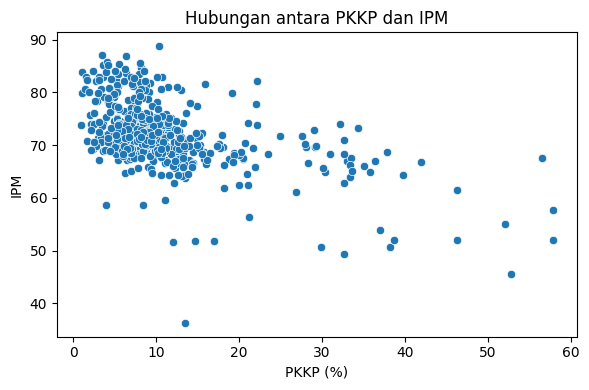

In [60]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='PKKP', y='IPM')
plt.title('Hubungan antara PKKP dan IPM')
plt.xlabel('PKKP (%)')
plt.ylabel('IPM')
plt.tight_layout()
plt.show()


# Pre Processing

In [61]:
#cek missing values
print(data.isnull().sum())

KAB_KOTA             0
IPM                  0
Anggaran             3
IPG                  0
PKKP                 0
PPM                  0
PPK                  0
PPK_Makanan         57
Air Layak            6
IKK                  0
PDRB                 0
IKKe                 0
Bekerja_Informal    10
Bekerja_Formal      20
dtype: int64


In [62]:
#mengatasi missing values
from sklearn.impute import SimpleImputer
import numpy as np

data_imputed = data.copy()

# Imputasi numerik
num_cols = data_imputed.select_dtypes(include=np.number).columns
imputer_num = SimpleImputer(strategy='median')
data_imputed[num_cols] = imputer_num.fit_transform(data_imputed[num_cols])

In [63]:
#cek missing values
print(data_imputed.isnull().sum())

KAB_KOTA            0
IPM                 0
Anggaran            0
IPG                 0
PKKP                0
PPM                 0
PPK                 0
PPK_Makanan         0
Air Layak           0
IKK                 0
PDRB                0
IKKe                0
Bekerja_Informal    0
Bekerja_Formal      0
dtype: int64


In [87]:
#atasi outlier
data_clean = data_imputed.copy()

# Daftar kolom yang ingin diatasi outliernya
kolom_outlier = ['Anggaran', 'PKKP', 'PPM', 'IKK', 'PPK', 'PDRB','IKKe', 'Bekerja_Informal']

# Fungsi capping berbasis IQR
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Terapkan capping
for col in kolom_outlier:
    if col in data_clean.columns:
        data_clean[f'{col}'] = cap_outliers_iqr(data_clean[col])


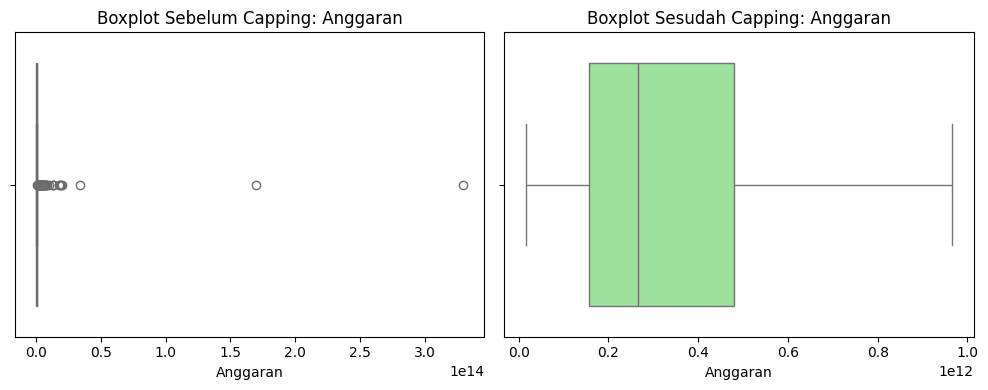

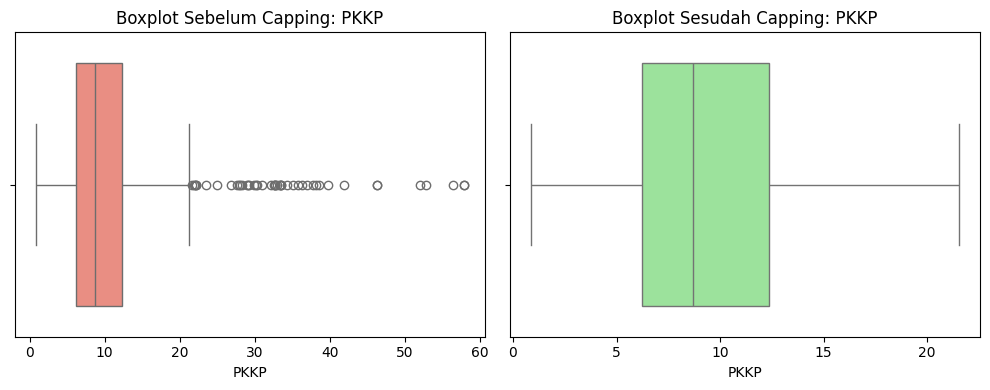

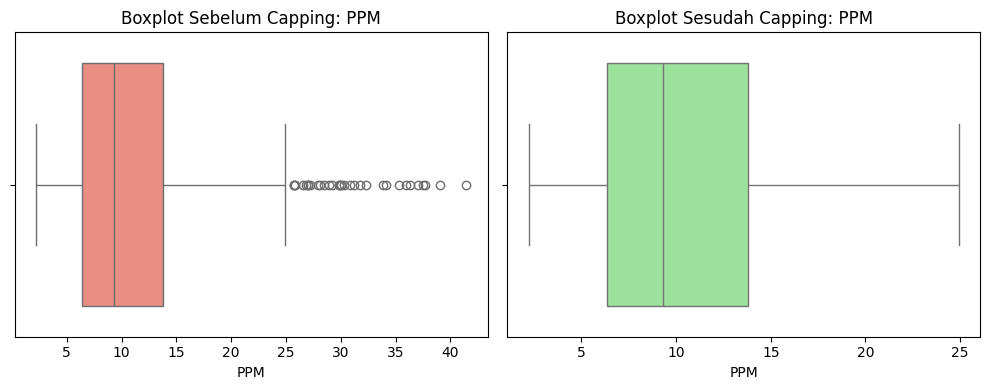

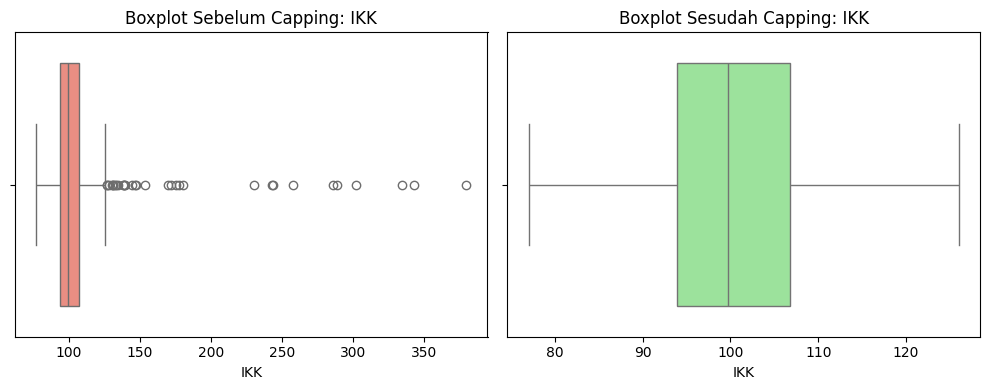

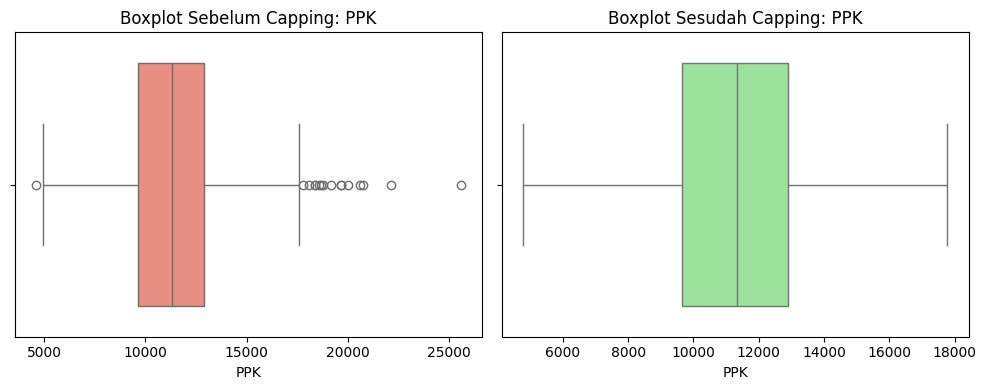

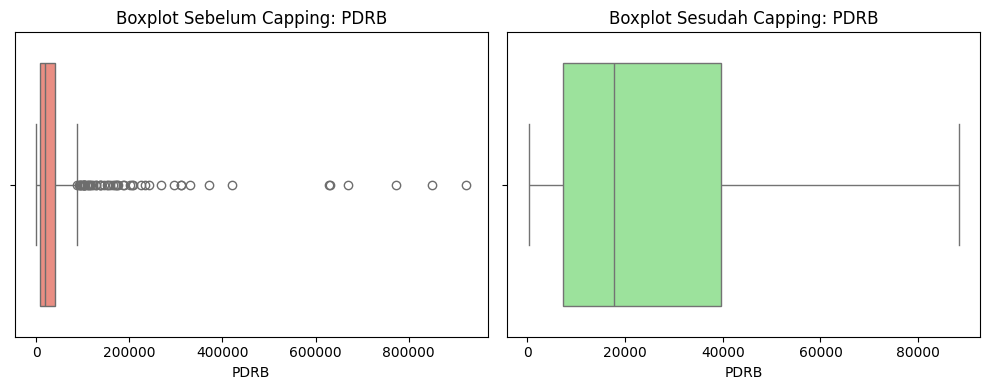

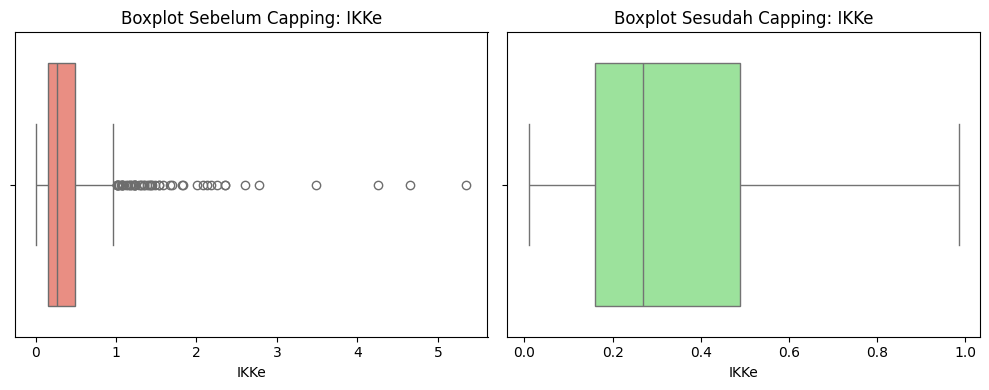

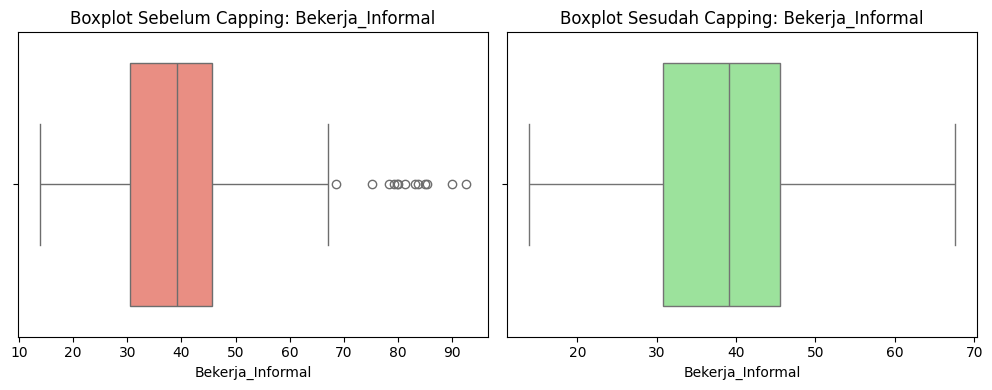

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_outlier = ['Anggaran', 'PKKP', 'PPM', 'IKK', 'PPK', 'PDRB','IKKe', 'Bekerja_Informal']

# Tampilkan boxplot sebelum dan sesudah capping
for col in kolom_outlier:
    capped_col = f'{col}'
    if capped_col in data_clean.columns:
        plt.figure(figsize=(10, 4))

        # Sebelum capping
        plt.subplot(1, 2, 1)
        sns.boxplot(x=data[col], color='salmon')
        plt.title(f'Boxplot Sebelum Capping: {col}')

        # Sesudah capping
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data_clean[capped_col], color='lightgreen')
        plt.title(f'Boxplot Sesudah Capping: {col}')

        plt.tight_layout()
        plt.show()

In [89]:
# Tampilkan 10 data pertama yang sudah bersih
data_clean[['KAB_KOTA', 'Anggaran', 'IPM', 'IPG', 'PKKP', 'PPM','PPK','Air Layak', 'IKK','PDRB', 'IKKe', 'Bekerja_Informal', 'Bekerja_Formal']].head(10)

,KAB_KOTA,Anggaran,IPM,IPG,PKKP,PPM,PPK,Air Layak,IKK,PDRB,IKKe,Bekerja_Informal,Bekerja_Formal
0,ACEH BARAT,3.007468e+11,73.69,59.59,8.41,17.60,10548.0,99.18,93.49,14053.0,0.75,31.27,17.00
1,ACEH BARAT DAYA,1.692916e+11,68.75,53.61,8.81,15.32,9559.0,94.81,92.68,5368.0,0.46,25.63,33.10
2,ACEH BESAR,7.904705e+11,75.13,50.49,8.13,13.21,10810.0,87.99,95.73,18412.0,0.47,34.31,26.02
3,ACEH JAYA,1.326058e+11,71.83,65.04,8.43,12.25,11007.0,75.76,98.86,3607.0,0.28,45.00,19.18
4,ACEH SELATAN,2.600539e+11,69.10,67.07,10.44,12.02,9190.0,83.32,98.65,7466.0,0.31,32.95,22.42
5,ACEH SINGKIL,1.244536e+11,70.75,59.81,7.41,19.06,9862.0,78.07,94.32,3441.0,0.74,31.26,25.93
6,ACEH TAMIANG,2.134980e+11,72.32,64.53,9.98,12.17,9529.0,76.39,94.91,11542.0,0.28,29.56,15.77
7,ACEH TENGAH,4.411316e+11,75.41,69.07,8.90,14.27,11805.0,88.37,100.11,10721.0,0.48,56.01,17.98
8,ACEH TENGGARA,2.419302e+11,71.70,56.40,9.44,11.99,8876.0,100.00,93.43,6737.0,0.35,40.17,20.10
9,ACEH TIMUR,3.455561e+11,69.87,49.26,8.71,13.26,9889.0,74.23,95.47,14935.0,0.46,30.16,20.27


# Feature Engineering


In [90]:
# Bikin label klasifikasi: 1 jika produktivitas >= 0.75, else 0
# 1 = produktivitas_tinggi dan 0 = produktivitas rendah
# Buat kolom baru untuk label kesejahteraan berdasarkan IPM
def klasifikasi_ipm(ipm):
    if ipm >= 75:
        return 'Tinggi'
    elif ipm >= 65:
        return 'Sedang'
    else:
        return 'Rendah'

# Terapkan fungsi ke kolom IPM
data_clean['Kategori_Kesejahteraan'] = data_clean['IPM'].apply(klasifikasi_ipm)


In [91]:
data_clean.head(10)

,KAB_KOTA,IPM,Anggaran,IPG,PKKP,PPM,PPK,PPK_Makanan,Air Layak,IKK,PDRB,IKKe,Bekerja_Informal,Bekerja_Formal,Kategori_Kesejahteraan
0,ACEH BARAT,73.69,3.007468e+11,59.59,8.41,17.60,10548.0,61.65,99.18,93.49,14053.0,0.75,31.27,17.00,Sedang
1,ACEH BARAT DAYA,68.75,1.692916e+11,53.61,8.81,15.32,9559.0,64.03,94.81,92.68,5368.0,0.46,25.63,33.10,Sedang
2,ACEH BESAR,75.13,7.904705e+11,50.49,8.13,13.21,10810.0,58.35,87.99,95.73,18412.0,0.47,34.31,26.02,Tinggi
3,ACEH JAYA,71.83,1.326058e+11,65.04,8.43,12.25,11007.0,60.65,75.76,98.86,3607.0,0.28,45.00,19.18,Sedang
4,ACEH SELATAN,69.10,2.600539e+11,67.07,10.44,12.02,9190.0,60.29,83.32,98.65,7466.0,0.31,32.95,22.42,Sedang
5,ACEH SINGKIL,70.75,1.244536e+11,59.81,7.41,19.06,9862.0,61.24,78.07,94.32,3441.0,0.74,31.26,25.93,Sedang
6,ACEH TAMIANG,72.32,2.134980e+11,64.53,9.98,12.17,9529.0,56.65,76.39,94.91,11542.0,0.28,29.56,15.77,Sedang
7,ACEH TENGAH,75.41,4.411316e+11,69.07,8.90,14.27,11805.0,57.59,88.37,100.11,10721.0,0.48,56.01,17.98,Tinggi
8,ACEH TENGGARA,71.70,2.419302e+11,56.40,9.44,11.99,8876.0,61.63,100.00,93.43,6737.0,0.35,40.17,20.10,Sedang
9,ACEH TIMUR,69.87,3.455561e+11,49.26,8.71,13.26,9889.0,62.17,74.23,95.47,14935.0,0.46,30.16,20.27,Sedang


In [92]:
#encode variabel kategorik
from sklearn.preprocessing import LabelEncoder

data_encoded = data_clean.copy()
le = LabelEncoder()
for col in data_encoded.select_dtypes(include='object').columns:
    data_encoded[col] = le.fit_transform(data_encoded[col])

In [93]:
#pemilihan fitur
features = [
    "Anggaran", "IPG", "PKKP", "PPM" , "PPK", "PPK_Makanan", "Air Layak", "IKK", "PDRB", "IKKe", "Bekerja_Informal", "Bekerja_Formal"
]

X = data_encoded[features]
y = data_encoded["Kategori_Kesejahteraan"]

In [94]:
X.head()
y.head()

,Kategori_Kesejahteraan
0,1
1,1
2,2
3,1
4,1


In [95]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pemodelan

In [96]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Support Vector Machine

In [98]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # Bisa ganti kernel='linear'
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

Naive Bayes

In [97]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)


Regresi Logistik

In [99]:
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [197]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

lgb_model = LGBMClassifier(num_class=3, objective='multiclass')
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM:\n", classification_report(y_test, y_pred_lgb))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 359, number of used features: 12
[LightGBM] [Info] Start training from score -2.625226
[LightGBM] [Info] Start training from score -0.373934
[LightGBM] [Info] Start training from score -1.428975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [199]:
!pip install catboost
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(loss_function='MultiClass', verbose=False)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

print("CatBoost:\n", classification_report(y_test, y_pred_cat))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00
CatBoost:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.85      0.98      0.91        98
           2       1.00      0.65      0.79        43

    accuracy                           0.88       154
   macro avg       0.90      0.83      0.85       154
weighted avg       0.89      0.88      0.87       154



**XGBOOST**

In [178]:
import numpy as np
from collections import Counter

# Hitung distribusi kelas
class_counts = Counter(y_train)
max_class = max(class_counts.values())
scale_weights = {cls: max_class / count for cls, count in class_counts.items()}
print("Scale weights per class:", scale_weights)


Scale weights per class: {1: 1.0, 0: 9.5, 2: 2.872093023255814}


In [194]:
import xgboost as xgb

# Buat parameter scale_pos_weight sesuai jumlah kelas
scale_pos_weight = max_class / min(class_counts.values())

# Konversi ke DMatrix
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Parameter untuk xgb.train
params = {
    'objective': 'multi:softprob',
    'num_class': 4,
    'max_depth': 8,
    'learning_rate': 0.05,
    'scale_pos_weight': scale_pos_weight,
    'eval_metric': 'mlogloss'
}

# Training dengan early stopping
evals = [(train_dmatrix, 'train'), (test_dmatrix, 'eval')]
model = xgb.train(
    params=params,
    dtrain=train_dmatrix,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=100,
    verbose_eval=True
)

# Prediksi probabilitas dan ambil argmax sebagai prediksi kelas
y_pred_proba = model.predict(test_dmatrix)
y_pred_xg = y_pred_proba.argmax(axis=1)


[0]	train-mlogloss:1.30381	eval-mlogloss:1.31649
[1]	train-mlogloss:1.22917	eval-mlogloss:1.25149
[2]	train-mlogloss:1.16101	eval-mlogloss:1.19307
[3]	train-mlogloss:1.09859	eval-mlogloss:1.13951


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:45:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	train-mlogloss:1.04077	eval-mlogloss:1.09061
[5]	train-mlogloss:0.98718	eval-mlogloss:1.04669
[6]	train-mlogloss:0.93729	eval-mlogloss:1.00669
[7]	train-mlogloss:0.89068	eval-mlogloss:0.96944
[8]	train-mlogloss:0.84744	eval-mlogloss:0.93479
[9]	train-mlogloss:0.80650	eval-mlogloss:0.90006
[10]	train-mlogloss:0.76870	eval-mlogloss:0.86930
[11]	train-mlogloss:0.73326	eval-mlogloss:0.84062
[12]	train-mlogloss:0.69934	eval-mlogloss:0.81438
[13]	train-mlogloss:0.66761	eval-mlogloss:0.78958
[14]	train-mlogloss:0.63776	eval-mlogloss:0.76716
[15]	train-mlogloss:0.60966	eval-mlogloss:0.74625
[16]	train-mlogloss:0.58295	eval-mlogloss:0.72531
[17]	train-mlogloss:0.55800	eval-mlogloss:0.70602
[18]	train-mlogloss:0.53411	eval-mlogloss:0.68892
[19]	train-mlogloss:0.51215	eval-mlogloss:0.67271
[20]	train-mlogloss:0.49067	eval-mlogloss:0.65626
[21]	train-mlogloss:0.47011	eval-mlogloss:0.64143
[22]	train-mlogloss:0.45061	eval-mlogloss:0.62660
[23]	train-mlogloss:0.43180	eval-mlogloss:0.61243
[24]	t

# Evaluasi Model

In [195]:
from sklearn.metrics import classification_report
print("XGboost:\n", classification_report(y_test, y_pred_xg))
print("SVM:\n", classification_report(y_test, svm_pred))
print("Naive Bayes:\n", classification_report(y_test, nb_pred))
print("Regresi Logistik:\n", classification_report(y_test, lr_pred))

XGboost:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.84      0.99      0.91        98
           2       0.96      0.60      0.74        43

    accuracy                           0.88       154
   macro avg       0.94      0.84      0.87       154
weighted avg       0.89      0.88      0.87       154

SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.70      0.93      0.80        98
           2       0.71      0.40      0.51        43

    accuracy                           0.70       154
   macro avg       0.47      0.44      0.44       154
weighted avg       0.64      0.70      0.65       154

Naive Bayes:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.70      0.88      0.78        98
           2       0.62      0.47      0.53  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# Visualisasi Hasil

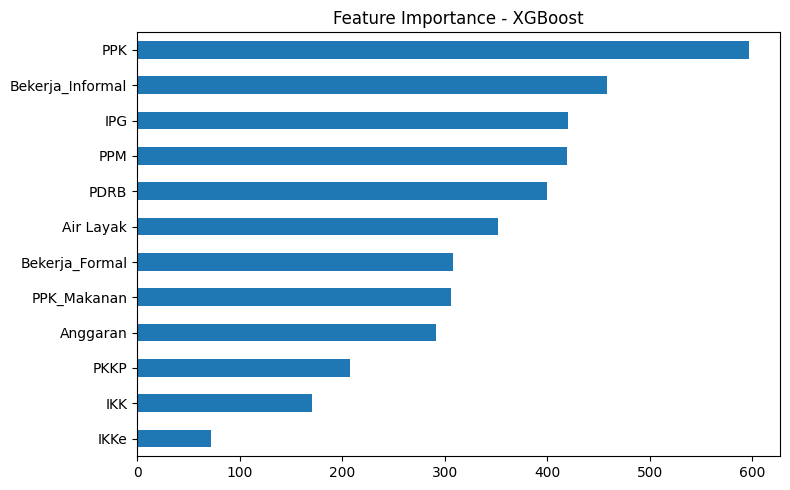

In [216]:
# Visualisasi fitur paling berpengaruh
import pandas as pd
import matplotlib.pyplot as plt

# Ambil feature importance dari model hasil xgb.train()
booster = model
importance = booster.get_score(importance_type='weight')

# Pastikan importance disimpan sebagai Series dan diurutkan
importance_series = pd.Series(importance).sort_values()

# Visualisasi bar horizontal
plt.figure(figsize=(8, 5))
importance_series.plot(kind='barh')
plt.title("Feature Importance - XGBoost")
plt.tight_layout()
plt.show()


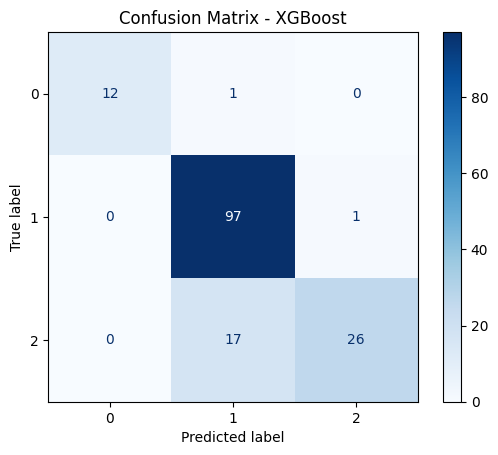

In [215]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()
